## EDA & Data Preprocessing
- Wordcloud
- Word count
- Word frequency
- Boxplot
- Sentiment Analysis

In [4]:
import pandas as pd

In [134]:
# Load the dataset
df = pd.read_csv('/Users/anna/Desktop/ANLP/Assignments/archive/Reviews.csv')

In [135]:
df.head(10) #view first 10 rows of df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [7]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [8]:
df.count()

Id                        568454
ProductId                 568454
UserId                    568454
ProfileName               568438
HelpfulnessNumerator      568454
HelpfulnessDenominator    568454
Score                     568454
Time                      568454
Summary                   568427
Text                      568454
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [138]:
# Convert Time column to datetime format
df['Time'] = pd.to_datetime(df['Time'], unit='s')
df['Time'].max()

Timestamp('2012-10-26 00:00:00')

In [137]:
#Get Max and Min of dataset
df.max(axis=0)
df.min(axis=0)

/var/folders/vt/18d8cm9d3yz9mm6xl9gv0v0r0000gn/T/ipykernel_68018/641832910.py:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

/var/folders/vt/18d8cm9d3yz9mm6xl9gv0v0r0000gn/T/ipykernel_68018/641832910.py:3: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Id                                                                        1
ProductId                                                        0006641040
UserId                                                   #oc-R103C0QSV1DF5E
HelpfulnessNumerator                                                      0
HelpfulnessDenominator                                                    0
Score                                                                     1
Time                                                    1999-10-08 00:00:00
Text                      ! think I just ruined my dish. open this and p...
dtype: object

In [12]:
#Word Count

def word_count(text): #create function split whitespace characters and calculating length
    wc = len(text.split())
    return wc

In [13]:
df['text_word_count'] = df['Text'].apply(word_count) #apply function to df

In [14]:
df['text_word_count'].describe()

count    568454.000000
mean         80.264023
std          79.455384
min           3.000000
25%          33.000000
50%          56.000000
75%          98.000000
max        3432.000000
Name: text_word_count, dtype: float64

In [17]:
#conda install matplotlib
#conda install -c anaconda seaborn
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Word Count Distribution')

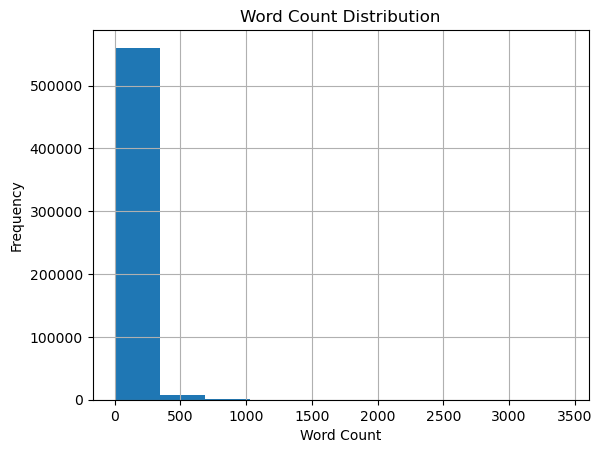

In [18]:
df['text_word_count'].hist(bins=10)
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Word Count Distribution')

Text(0.5, 1.0, 'Boxplot Score vs Word Count')

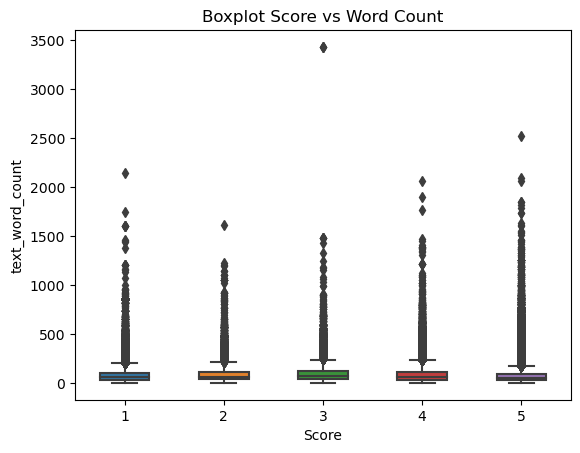

In [19]:
sns.boxplot(x = "Score", 
            y = "text_word_count",
            width=0.5,
            data =df);
plt.title('Boxplot Score vs Word Count')

Text(0.5, 1.0, 'Boxplot Score vs Word Count')

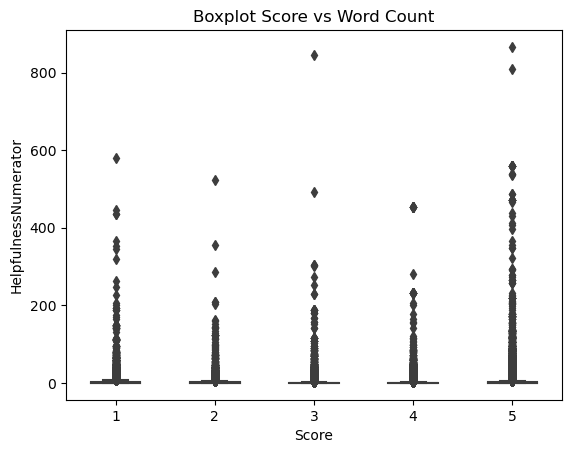

In [20]:
#Distribution of rating scores and average helpfulness
sns.boxplot(x = "Score", 
            y = "HelpfulnessNumerator",
            width=0.5,
            data =df);
plt.title('Boxplot Score vs Word Count')

In [22]:
#Word Frequency
#conda install -c anaconda nltk
import nltk
from nltk.tokenize import word_tokenize

In [23]:
#Calculate frequencies to determine most common word in the column 'Text'

# Convert series to string
text = df['Text'].to_string()
text = text.lower() #convert to lowercase

#create word tokens
tokenized_words=word_tokenize(text)

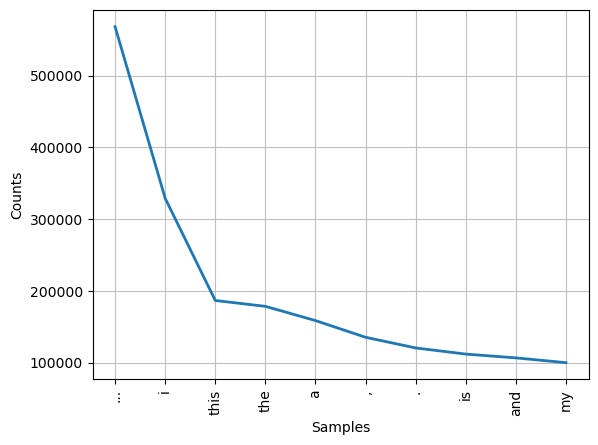

[('...', 568163), ('i', 329129), ('this', 186746), ('the', 178594), ('a', 158767), (',', 135491), ('.', 120641), ('is', 112079), ('and', 106813), ('my', 100131), ('of', 83310), ('to', 82877), ('these', 78502), ('for', 68168), ('it', 65627), ('have', 59020), ('are', 48499), ('love', 47961), ('was', 46396), ('in', 44233)]


In [24]:
all_words=nltk.FreqDist(tokenized_words)
all_words.plot(10);
print(all_words.most_common(20))

In [30]:
#Word Cloud
#conda install -c conda-forge wordcloud
from wordcloud import WordCloud
wordcloud = WordCloud(max_words=100).generate(text)


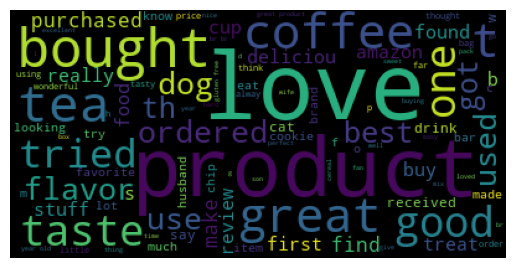

In [31]:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Text(0.5, 1.0, 'Time Distribution')

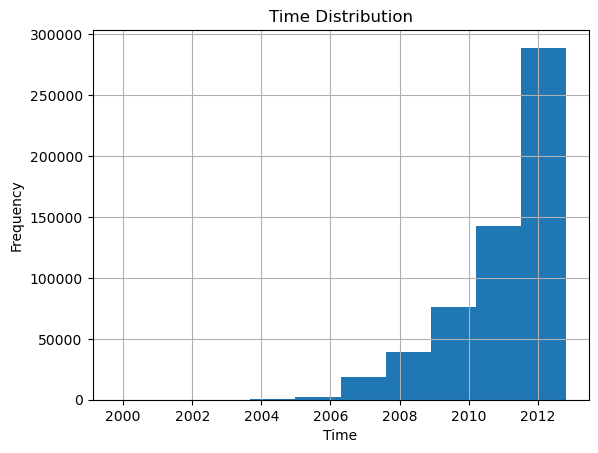

In [32]:
#Time Distribution plot 1999-2012
#More records in 2012 than 1999
#Time distribution can be useful that newer reviews require more predictions

df['Time'].hist(bins=10)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Time Distribution')


## Data Preprocessing


In [ ]:
#Lowercase
#Tokenisation
#Stopwords
#Lemmatization
#Infrequent Words

In [139]:
# Data Transformation: Converting article text to lowercase as Python is case-sensitive
df['Text'] = df['Text'].astype(str).str.lower()
df.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,i have bought several of the vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,product arrived labeled as jumbo salted peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",this is a confection that has been around a fe...


In [140]:
# Data Tokenisation create word tokens
from nltk.tokenize import RegexpTokenizer

regexp = RegexpTokenizer('\w+')

df['text_token']=df['Text'].apply(regexp.tokenize)
df.head(3)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,text_token
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,i have bought several of the vitality canned d...,"[i, have, bought, several, of, the, vitality, ..."
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,product arrived labeled as jumbo salted peanut...,"[product, arrived, labeled, as, jumbo, salted,..."
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",this is a confection that has been around a fe...,"[this, is, a, confection, that, has, been, aro..."


In [101]:
# Stopwords: Set up stop words for removal
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stopwords = nltk.corpus.stopwords.words("english")
print(stopwords)

# Extend the list with your own custom stopwords
my_stopwords = ["'...", ",", ".", "this", "a", "the", "'s", "n't", "'ve"]
stopwords.extend(my_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /Users/anna/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [142]:
df['text_token'] = df['text_token'].apply(lambda x: [item for item in x if item not in stopwords])
df.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,text_token
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,i have bought several of the vitality canned d...,"[bought, several, vitality, canned, dog, food,..."
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,product arrived labeled as jumbo salted peanut...,"[product, arrived, labeled, jumbo, salted, pea..."
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",this is a confection that has been around a fe...,"[confection, around, centuries, light, pillowy..."


In [143]:
#Remove infrequent words
#We first change the format of text_token to strings and keep only words which are longer than 2 letters
df['text_string'] = df['text_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))
df[['Text', 'text_token', 'text_string']].head()

,Text,text_token,text_string
0,i have bought several of the vitality canned d...,"[bought, several, vitality, canned, dog, food,...",bought several vitality canned dog food produc...
1,product arrived labeled as jumbo salted peanut...,"[product, arrived, labeled, jumbo, salted, pea...",product arrived labeled jumbo salted peanuts p...
2,this is a confection that has been around a fe...,"[confection, around, centuries, light, pillowy...",confection around centuries light pillowy citr...
3,if you are looking for the secret ingredient i...,"[looking, secret, ingredient, robitussin, beli...",looking secret ingredient robitussin believe f...
4,great taffy at a great price. there was a wid...,"[great, taffy, great, price, wide, assortment,...",great taffy great price wide assortment yummy ...


In [144]:
#Create a list of all words
all_words = ' '.join([word for word in df['text_string']])

In [145]:
#Tokenise all words
tokenized_words = nltk.tokenize.word_tokenize(all_words)

In [146]:
#Frequency distribution
from nltk.probability import FreqDist

fdist = FreqDist(tokenized_words)
fdist

FreqDist({'like': 256215, 'good': 200638, 'one': 176867, 'taste': 172856, 'product': 167739, 'great': 167175, 'coffee': 166782, 'flavor': 148023, 'tea': 138198, 'food': 128513, ...})

In [148]:
#Drop words that appear less than 3 times
df['text_string_fdist'] = df['text_token'].apply(lambda x: ' '.join([item for item in x if fdist[item] >= 3 ]))

In [149]:
df[['Text', 'text_token', 'text_string', 'text_string_fdist']].head()

,Text,text_token,text_string,text_string_fdist
0,i have bought several of the vitality canned d...,"[bought, several, vitality, canned, dog, food,...",bought several vitality canned dog food produc...,bought several vitality canned dog food produc...
1,product arrived labeled as jumbo salted peanut...,"[product, arrived, labeled, jumbo, salted, pea...",product arrived labeled jumbo salted peanuts p...,product arrived labeled jumbo salted peanuts p...
2,this is a confection that has been around a fe...,"[confection, around, centuries, light, pillowy...",confection around centuries light pillowy citr...,confection around centuries light pillowy citr...
3,if you are looking for the secret ingredient i...,"[looking, secret, ingredient, robitussin, beli...",looking secret ingredient robitussin believe f...,looking secret ingredient robitussin believe f...
4,great taffy at a great price. there was a wid...,"[great, taffy, great, price, wide, assortment,...",great taffy great price wide assortment yummy ...,great taffy great price wide assortment yummy ...


In [150]:
#Lemmatization
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /Users/anna/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/anna/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [151]:
from nltk.stem import WordNetLemmatizer
wordnet_lem = WordNetLemmatizer()
df['text_string_lem'] = df['text_string_fdist'].apply(wordnet_lem.lemmatize)

In [152]:
# check if the columns are equal
df['is_equal']= (df['text_string_fdist']==df['text_string_lem'])
# show level count
df.is_equal.value_counts()

True    568454
Name: is_equal, dtype: int64

In [153]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,text_token,text_string,text_string_fdist,text_string_lem,is_equal
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,i have bought several of the vitality canned d...,"[bought, several, vitality, canned, dog, food,...",bought several vitality canned dog food produc...,bought several vitality canned dog food produc...,bought several vitality canned dog food produc...,True
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,product arrived labeled as jumbo salted peanut...,"[product, arrived, labeled, jumbo, salted, pea...",product arrived labeled jumbo salted peanuts p...,product arrived labeled jumbo salted peanuts p...,product arrived labeled jumbo salted peanuts p...,True
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",this is a confection that has been around a fe...,"[confection, around, centuries, light, pillowy...",confection around centuries light pillowy citr...,confection around centuries light pillowy citr...,confection around centuries light pillowy citr...,True
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,if you are looking for the secret ingredient i...,"[looking, secret, ingredient, robitussin, beli...",looking secret ingredient robitussin believe f...,looking secret ingredient robitussin believe f...,looking secret ingredient robitussin believe f...,True
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,great taffy at a great price. there was a wid...,"[great, taffy, great, price, wide, assortment,...",great taffy great price wide assortment yummy ...,great taffy great price wide assortment yummy ...,great taffy great price wide assortment yummy ...,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,2011-03-09,Will not do without,great for sesame chicken..this is a good if no...,"[great, sesame, chicken, good, better, restura...",great sesame chicken good better resturants ea...,great sesame chicken good better resturants ea...,great sesame chicken good better resturants ea...,True
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,2012-03-09,disappointed,i'm disappointed with the flavor. the chocolat...,"[disappointed, flavor, chocolate, notes, espec...",disappointed flavor chocolate notes especially...,disappointed flavor chocolate notes especially...,disappointed flavor chocolate notes especially...,True
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,2012-02-21,Perfect for our maltipoo,"these stars are small, so you can give 10-15 o...","[stars, small, give, 10, 15, one, training, se...",stars small give one training session tried tr...,stars small give one training session tried tr...,stars small give one training session tried tr...,True
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,2012-03-13,Favorite Training and reward treat,these are the best treats for training and rew...,"[best, treats, training, rewarding, dog, good,...",best treats training rewarding dog good groomi...,best treats training rewarding dog good groomi...,best treats training rewarding dog good groomi...,True


In [154]:
all_words_lem = ' '.join([word for word in df['text_string_lem']])

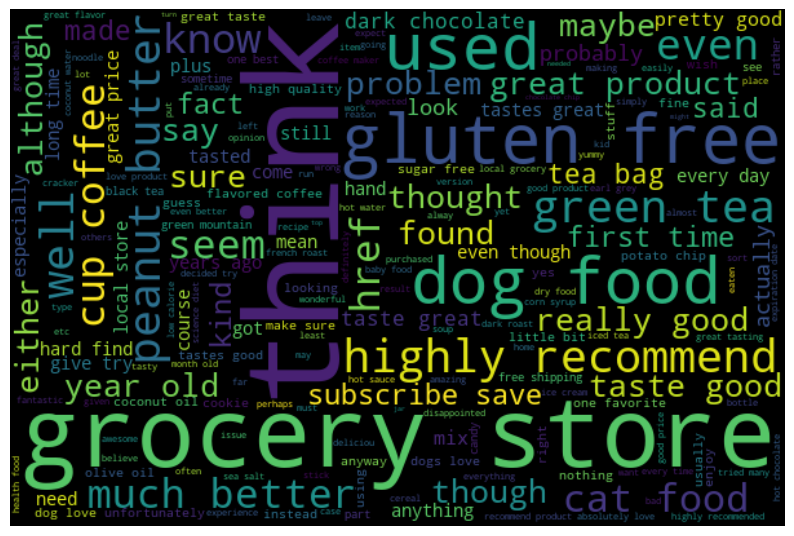

In [155]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words_lem)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

In [115]:
#Frequency Distribution 
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/anna/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [116]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

words = nltk.word_tokenize(all_words_lem)
fd = FreqDist(words)

In [117]:
fd.most_common(3)

[('like', 256215), ('good', 200638), ('one', 176867)]

In [118]:
fd.tabulate(3)

  like   good    one 
256215 200638 176867 


In [119]:
#Plot common words

# Obtain top 10 words
top_10 = fd.most_common(10)


In [120]:
# Create pandas series to make plotting easier
fdist = pd.Series(dict(top_10))

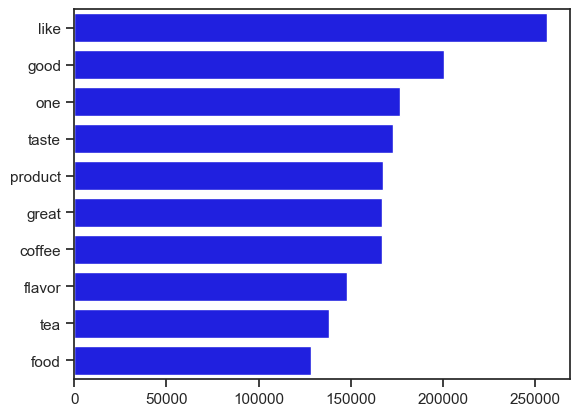

In [121]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.barplot(y=fdist.index, x=fdist.values, color='blue');

In [122]:
fd["problem"] #search specific word

19352

In [123]:
#Sentiment Analysis
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/anna/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [124]:
#Sentiment Intensity Analyzer

from nltk.sentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

In [156]:
df['polarity'] = df['text_string_lem'].apply(lambda x: analyzer.polarity_scores(x))
df.tail(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,text_token,text_string,text_string_fdist,text_string_lem,is_equal,polarity
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,2012-02-21,Perfect for our maltipoo,"these stars are small, so you can give 10-15 o...","[stars, small, give, 10, 15, one, training, se...",stars small give one training session tried tr...,stars small give one training session tried tr...,stars small give one training session tried tr...,True,"{'neg': 0.0, 'neu': 0.796, 'pos': 0.204, 'comp..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,2012-03-13,Favorite Training and reward treat,these are the best treats for training and rew...,"[best, treats, training, rewarding, dog, good,...",best treats training rewarding dog good groomi...,best treats training rewarding dog good groomi...,best treats training rewarding dog good groomi...,True,"{'neg': 0.062, 'neu': 0.283, 'pos': 0.654, 'co..."
568453,568454,B001LR2CU2,A3LGQPJCZVL9UC,srfell17,0,0,5,2012-05-31,Great Honey,"i am very satisfied ,product is as advertised,...","[satisfied, product, advertised, use, cereal, ...",satisfied product advertised use cereal raw vi...,satisfied product advertised use cereal raw vi...,satisfied product advertised use cereal raw vi...,True,"{'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'comp..."


In [157]:
#Transform Data
# Change data structure
df = pd.concat(
    [df.drop(['Id','ProductId','UserId', 'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score','Summary' ], axis=1), 
     df['polarity'].apply(pd.Series)], axis=1)
df.head(3)

,Time,Text,text_token,text_string,text_string_fdist,text_string_lem,is_equal,polarity,neg,neu,pos,compound
0,2011-04-27,i have bought several of the vitality canned d...,"[bought, several, vitality, canned, dog, food,...",bought several vitality canned dog food produc...,bought several vitality canned dog food produc...,bought several vitality canned dog food produc...,True,"{'neg': 0.0, 'neu': 0.503, 'pos': 0.497, 'comp...",0.000,0.503,0.497,0.9413
1,2012-09-07,product arrived labeled as jumbo salted peanut...,"[product, arrived, labeled, jumbo, salted, pea...",product arrived labeled jumbo salted peanuts p...,product arrived labeled jumbo salted peanuts p...,product arrived labeled jumbo salted peanuts p...,True,"{'neg': 0.129, 'neu': 0.762, 'pos': 0.11, 'com...",0.129,0.762,0.110,-0.1027
2,2008-08-18,this is a confection that has been around a fe...,"[confection, around, centuries, light, pillowy...",confection around centuries light pillowy citr...,confection around centuries light pillowy citr...,confection around centuries light pillowy citr...,True,"{'neg': 0.171, 'neu': 0.544, 'pos': 0.285, 'co...",0.171,0.544,0.285,0.8073


In [158]:
# Create new variable with sentiment "neutral," "positive" and "negative"
df['sentiment'] = df['compound'].apply(lambda x: 'positive' if x >0 else 'neutral' if x==0 else 'negative')
df.head(4)

,Time,Text,text_token,text_string,text_string_fdist,text_string_lem,is_equal,polarity,neg,neu,pos,compound,sentiment
0,2011-04-27,i have bought several of the vitality canned d...,"[bought, several, vitality, canned, dog, food,...",bought several vitality canned dog food produc...,bought several vitality canned dog food produc...,bought several vitality canned dog food produc...,True,"{'neg': 0.0, 'neu': 0.503, 'pos': 0.497, 'comp...",0.000,0.503,0.497,0.9413,positive
1,2012-09-07,product arrived labeled as jumbo salted peanut...,"[product, arrived, labeled, jumbo, salted, pea...",product arrived labeled jumbo salted peanuts p...,product arrived labeled jumbo salted peanuts p...,product arrived labeled jumbo salted peanuts p...,True,"{'neg': 0.129, 'neu': 0.762, 'pos': 0.11, 'com...",0.129,0.762,0.110,-0.1027,negative
2,2008-08-18,this is a confection that has been around a fe...,"[confection, around, centuries, light, pillowy...",confection around centuries light pillowy citr...,confection around centuries light pillowy citr...,confection around centuries light pillowy citr...,True,"{'neg': 0.171, 'neu': 0.544, 'pos': 0.285, 'co...",0.171,0.544,0.285,0.8073,positive
3,2011-06-13,if you are looking for the secret ingredient i...,"[looking, secret, ingredient, robitussin, beli...",looking secret ingredient robitussin believe f...,looking secret ingredient robitussin believe f...,looking secret ingredient robitussin believe f...,True,"{'neg': 0.0, 'neu': 0.854, 'pos': 0.146, 'comp...",0.000,0.854,0.146,0.4404,positive


In [159]:
#Analyse Data
# Text with highest positive sentiment
df.loc[df['compound'].idxmax()].values

array([Timestamp('2011-12-16 00:00:00'),
       '*********************************************************<br /> update:  read the update below first. thanks. (june 15 and august 3, 2012)<br />*********************************************************<br />  i was, but no more (actively anyway). we have four cats: two ("normals") who eat about anything, one with kidney disease (crf/ckd) and accompanying reduced appetite, and one that has picky (and weird) tastes.  in the process of trying to find an appetite stimulant for the mom-cat (with crf/ckd) i tried out several products on her and the others (the kids) as well.<br />here are the results of this less than scientific (or definitive) survey:<br /><br />  drs.foster&smith shrimp snappies treats (ground to powder)-----------all refused.<br />  freeze-dried powders (prowl and ziwi peak)----------------------------no effect. all but one (ms. picky) ate them.<br />  seafood juices (tuna, oyster, sardine, etc.)----------------------------

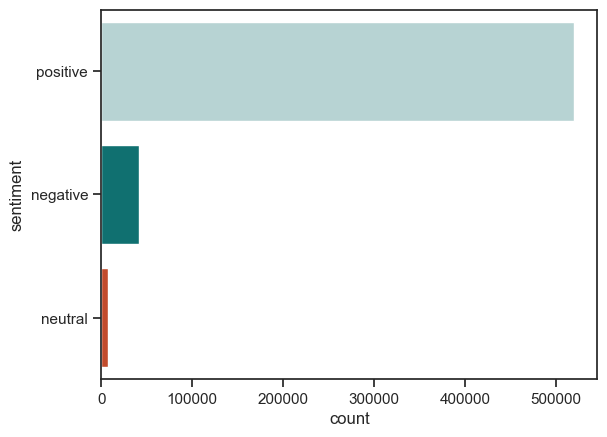

In [160]:
#Visualise Sentiment
# Number of Reviews
sns.countplot(y='sentiment', 
             data=df, 
             palette=['#b2d8d8',"#008080", '#db3d13']
             );

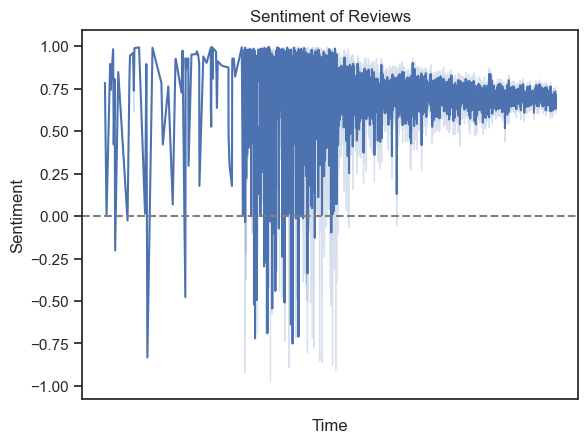

In [161]:
# Lineplot
g = sns.lineplot(x='Time', y='compound', data=df)

g.set(xticklabels=[]) 
g.set(title='Sentiment of Reviews')
g.set(xlabel="Time")
g.set(ylabel="Sentiment")
g.tick_params(bottom=False)

g.axhline(0, ls='--', c = 'grey');

In [ ]:
######################### WORK IN PROGRESS #######################################################

Sentiment analysis and regression models to analyse amazon food reviews affecting the helpfulness score

Unsupervised
sentiment models: feed into features
prediction for score and helpfulness. Target: rating/helpfulness

Feature building provides paveway to the model
- cat boost

#give model for feedback to provide
#EDA: K-means to cluster topic model beginning: feature to feed into classification model
#focus on NLP

In [ ]:
#Test analysis techniques
#Classification
#extraction
#Frequency
#collocation
#Concordance 
#clustering


In [ ]:
#Sentiment analysis with deep learning
#find what is positive and negative
#Modality, negative words, negative sentiment, negative emotion
#Predict the sentiment of a review
#Hugging-face roberta model


In [ ]:
#Logistic regression: Predict if a review is postive or negative based on summary/text
#Test Accuracy
#Confusion matrix


In [ ]:
#DL for text classification - keras
#Baseline model: Overfitting/underfitting
#Deep neural network
#Improve accuracy of model


In [ ]:
#Investigate the causes of negative reviews - what makes a review negative?

In [ ]:
#Predict helpfulness of a review

In [1]:
#Find repeating product reviews from user

In [ ]:
#DL models
#Topis classification with deep learning -> justify models
#Sentiment
#intent

In [ ]:
#DL sentiment analysier
# tag each peice of text as positive or negative or nuetral based on the sneitment
#Test